
# Wolfcamp Example - Bulk Process las files


This example shows the full petrophysical workflow avaiable in PetroPy
for a folder of wolfcamp las file courtesy of University Lands Texas.

The workflow progresses in 3 iterations to edit data, calculate the
petrophysical model, and to calculate statistics and save. To better
understand the worflow first read through the `single well`_ example.


The First Iteration

1. Read las file and create a :class:`petropy.Log` object
2. Create a :class:`petropy.LogViewer` show in edit_mode to fix data
3. Writes updated data to new folder via :meth:`petropy.Log.write`

The Second Iteration

1. Read las file and create a :class:`petropy.Log` object
2. Load tops from a csv file using :meth:`petropy.Log.tops_from_csv`
3. Calculate fluid properties by
    1. Loading parameters via :meth:`petropy.Log.fluid_properties_parameters_from_csv`
    2. Calculating over formations via :meth:`petropy.Log.formation_fluid_properties`
4. Calculate mulitmineral properties by
    1. Loading parameters via :meth:`petropy.Log.multimineral_parameters_from_csv`
    2. Calculating over formations via :meth:`petropy.Log.formation_multimineral_model`
5. Curve summations via :meth:`petropy.Log.summations`
6. Adding pay flags via :meth:`petropy.Log.add_pay_flag`

After the second iteration, the list processed_logs is used to perform
electrofacies calculations via :meth:`petropy.electrofacies`

The Third Iteration

1. Exporting log statistics via :meth:`petropy.Log.statistics`
2. Saving LogViewer to png and Log to las

Downloading the script at the bottom of this webpage will not download the required las
files or PetroPy logo. To download all files, view the `examples folder`_ on GitHub.




In [76]:
%matplotlib inline
import sys
sys.path.append(r'C:\Users\hooge\GitHub\Geology\PetroPy')
import petropy as ptr

# use glob to get file paths
import glob

# import pyplot to add logo to figure
import matplotlib.pyplot as plt
from datetime import datetime



In [69]:

# define parameters 

f = ['WFMPA', 'WFMPB', 'WFMPC']
sum_curves = ['OIP', 'BVH', 'PHIE']
stats_curves = ['OIP', 'BVH', 'PHIE', 'SW', 'VCLAY', 'TOC']

flag_1_gtoe = [('PHIE', 0.03)]
flag_2_gtoe = [('PAY_FLAG_1', 1), ('BVH', 0.02)]
flag_3_gtoe = [('PAY_FLAG_2', 1)]
flag_3_ltoe = [('SW', 0.2)]

# get paths for all las files in folder
# wfmp_raw_las

raw_las_folder = "../../examples/wfmp_raw_las/"
las_files = glob.glob(raw_las_folder + r"*.las")
print(len(las_files))


2


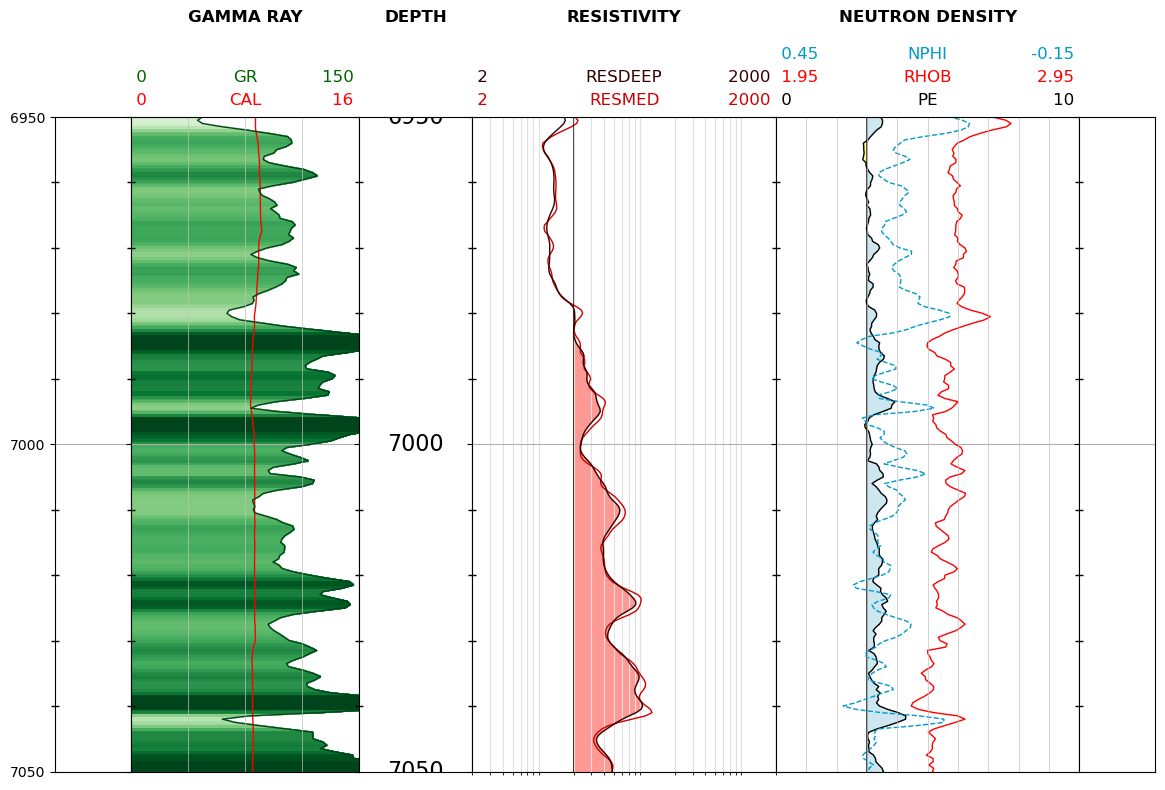

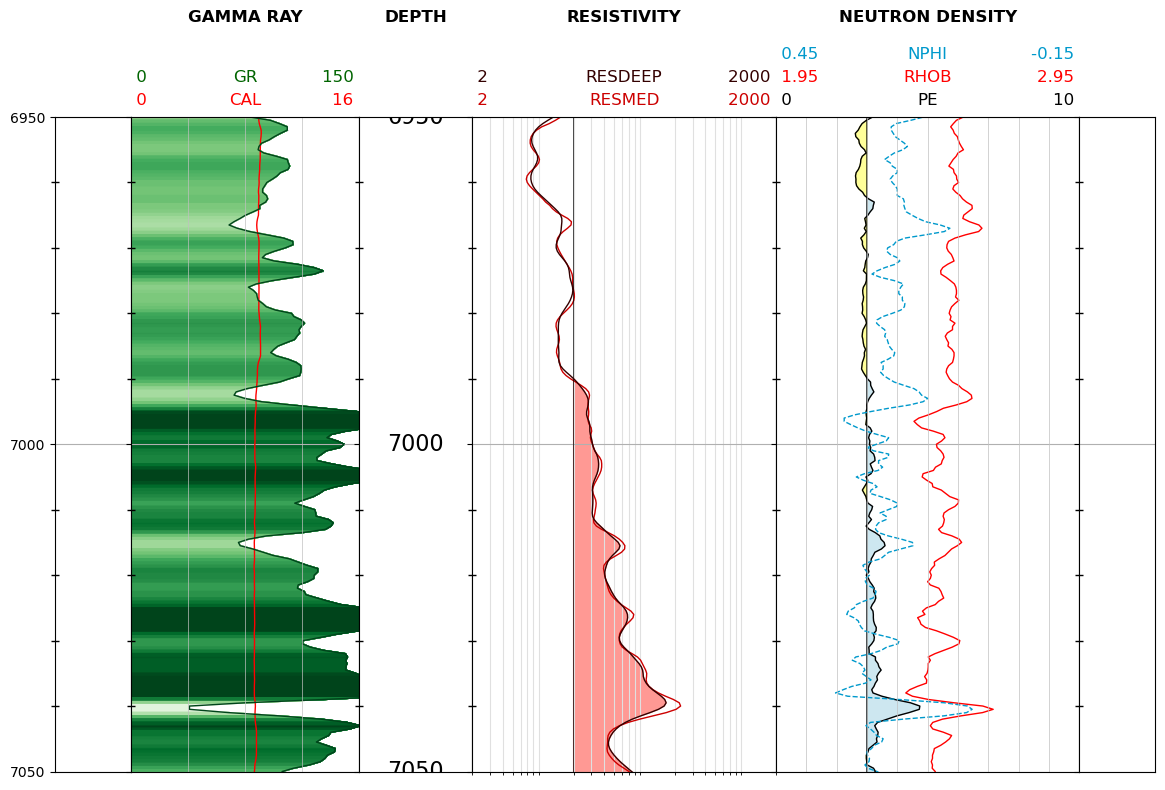

In [70]:
### First Iteration ###

for las_file in las_files:

    ### 1. read raw las file ###

    # create a Log object by reading a file path  

    log = ptr.Log(las_file)

    ### 2. graphically edit raw log ###

    # use manual mode for fixing borehole washout 
    # and other changes requiring redrawing data  

    # use bulk shift mode to linearly adjust all curve data                                  

    # close both windows to continue program      

    viewer = ptr.LogViewer(log, top = 6950, height = 100)
    # viewer.show(edit_mode = True)
    viewer.show()

    # overwrite log variable with updated log from LogViewer edits                        

    log = viewer.log

    # find way to name well, looking for well name or UWI or API 

    if len(log.well['WELL'].value) > 0:
        well_name = log.well['WELL'].value
    elif len(log.well['UWI'].value) > 0:
        well_name = str(log.well['UWI'].value)
    elif len(log.well['API'].value) > 0:
        well_name = str(log.well['API'].value)
    else:
        well_name = 'UNKNOWN'
    well_name = well_name.replace('.', '')

    # save changes to edited folder in case  
    # reprocessing after editing is needed   

    edited_log_file_name = f"../../examples/wfmp_edited_las/{well_name}_edited.las"
    # log.write(edited_log_file_name)


In [71]:
### Second Iteration ###

edited_file_folder = "../../examples/wfmp_edited_las/"
edited_las_files = glob.glob(edited_file_folder + r"*.las")

# create list to hold processed log objects   

processed_logs = []

for las_file in edited_las_files:
    print(las_file)
    ### 1. Read las file ###

    log = ptr.Log(las_file)

    ### 2. load tops ###

    log.tops_from_csv('../../examples/wfmp_raw_las/wfmp_tops.csv')

    ### 3. fluid properties ###

    # load fluid properties from a csv file       
    # since path is not specified, load default   
    # csv file included with petropy              

    log.fluid_properties_parameters_from_csv()

    # calculate fluid properties over defined     
    # formations with parameter WFMP from         
    # previously loaded csv                       

    log.formation_fluid_properties(f, parameter = 'WFMP')

    ### 4. multimineral model ###

    # load multimineral parameters from csv file  
    # since path is not specified, load default   
    # csv file included with petropy              

    log.multimineral_parameters_from_csv()

    # calculate multiminearl model over defined   
    # formations with parameter WFMP from         
    # previously loaded csv                       

    log.formation_multimineral_model(f, parameter = 'WFMP')

    ### 5. summations ###

    log.summations(f, curves = sum_curves)

    ### 6. pay flags ###

    log.add_pay_flag(f, greater_than_or_equal = flag_1_gtoe)
    log.add_pay_flag(f, greater_than_or_equal = flag_2_gtoe)
    log.add_pay_flag(f, greater_than_or_equal = flag_3_gtoe,
                    less_than_or_equal = flag_3_ltoe)

    # add log to processed_logs list              

    processed_logs.append(log)


../../examples/wfmp_edited_las\UNIVERSITY 6-17 NO1_edited.las
../../examples/wfmp_edited_las\UNIVERSITY 6-18W NO1_edited.las
../../examples/wfmp_edited_las\UNIVERSITY 6-7 NO1_edited.las


In [72]:
### 9. electrofacies ###

# define curves to use in electofaceis module 

electro_logs = ['GR_N', 'RESDEEP_N', 'NPHI_N', 'RHOB_N', 'PE_N']

# specifiy to use logarithmically scaled RESDEEP_N 

scaled = ['RESDEEP_N']

# calculate electrofacies for the processed logs 
final_logs = ptr.electrofacies(processed_logs, f,
                                electro_logs, 6, log_scale = scaled)



c:\Users\hooge\miniconda3\envs\geophys312\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


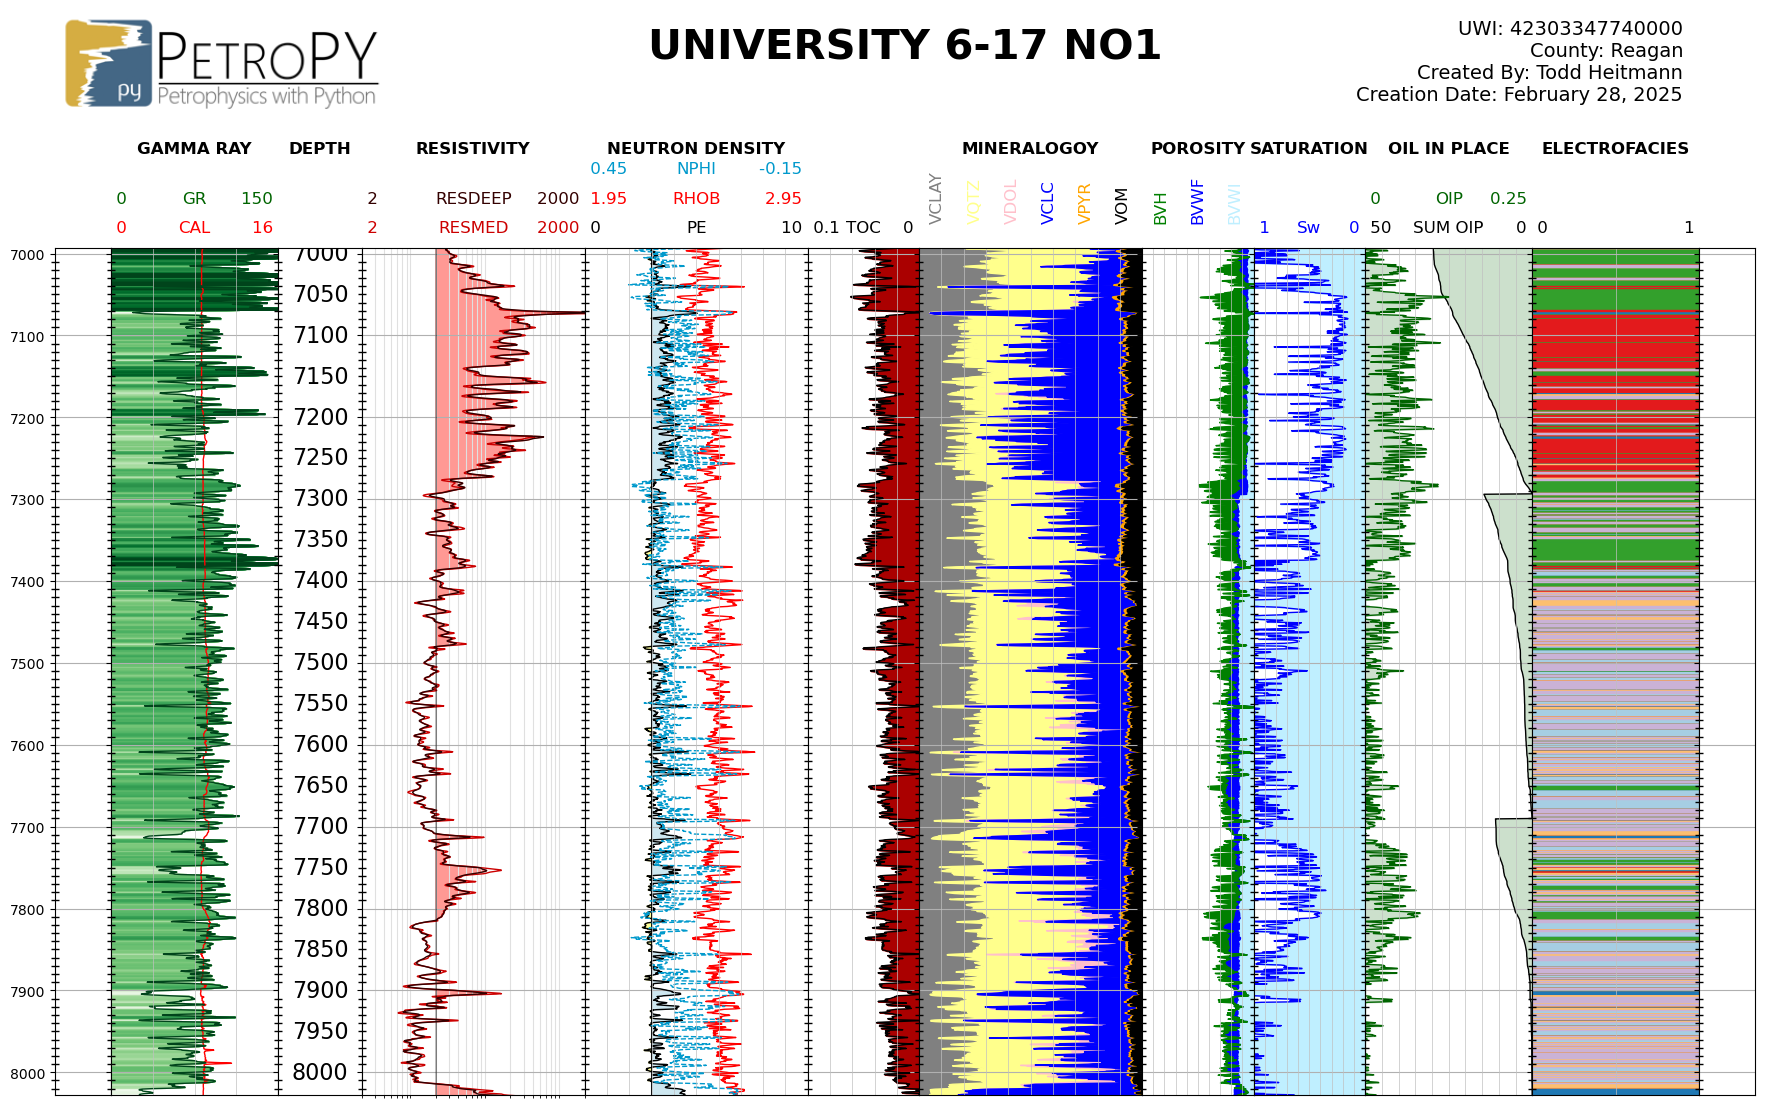

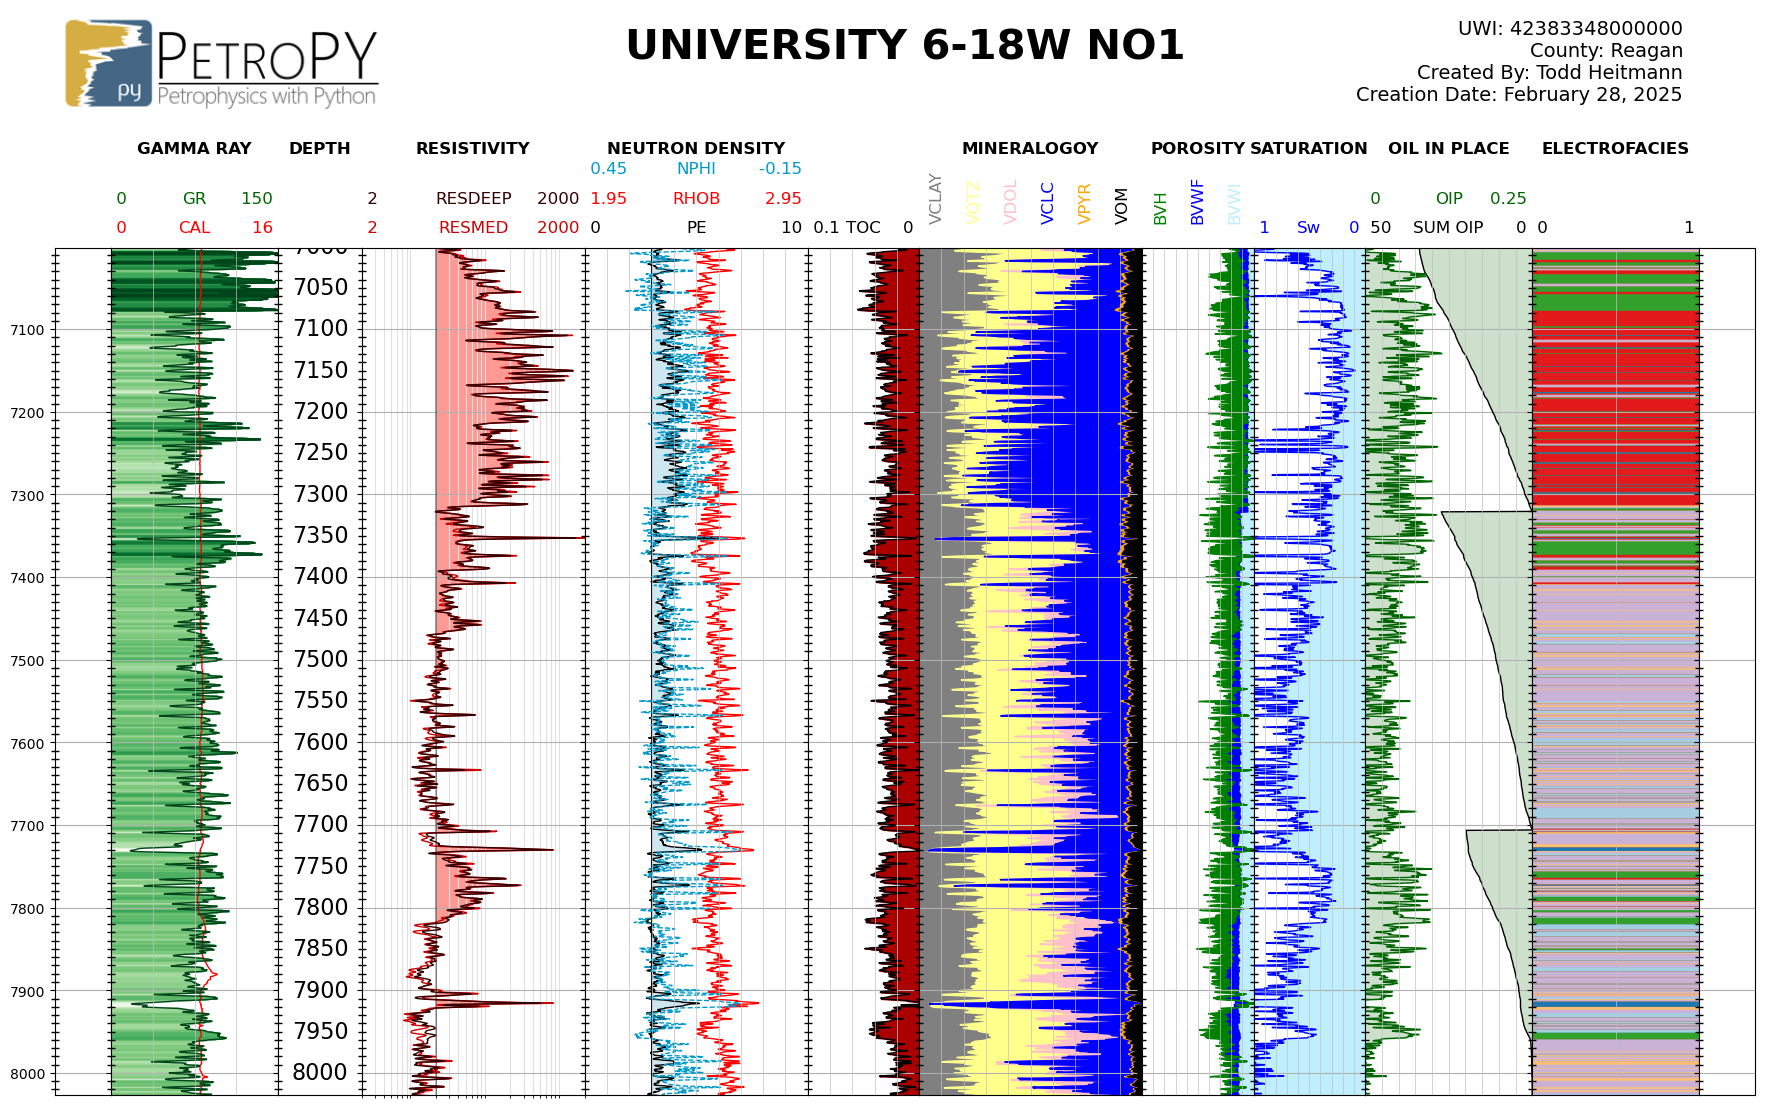

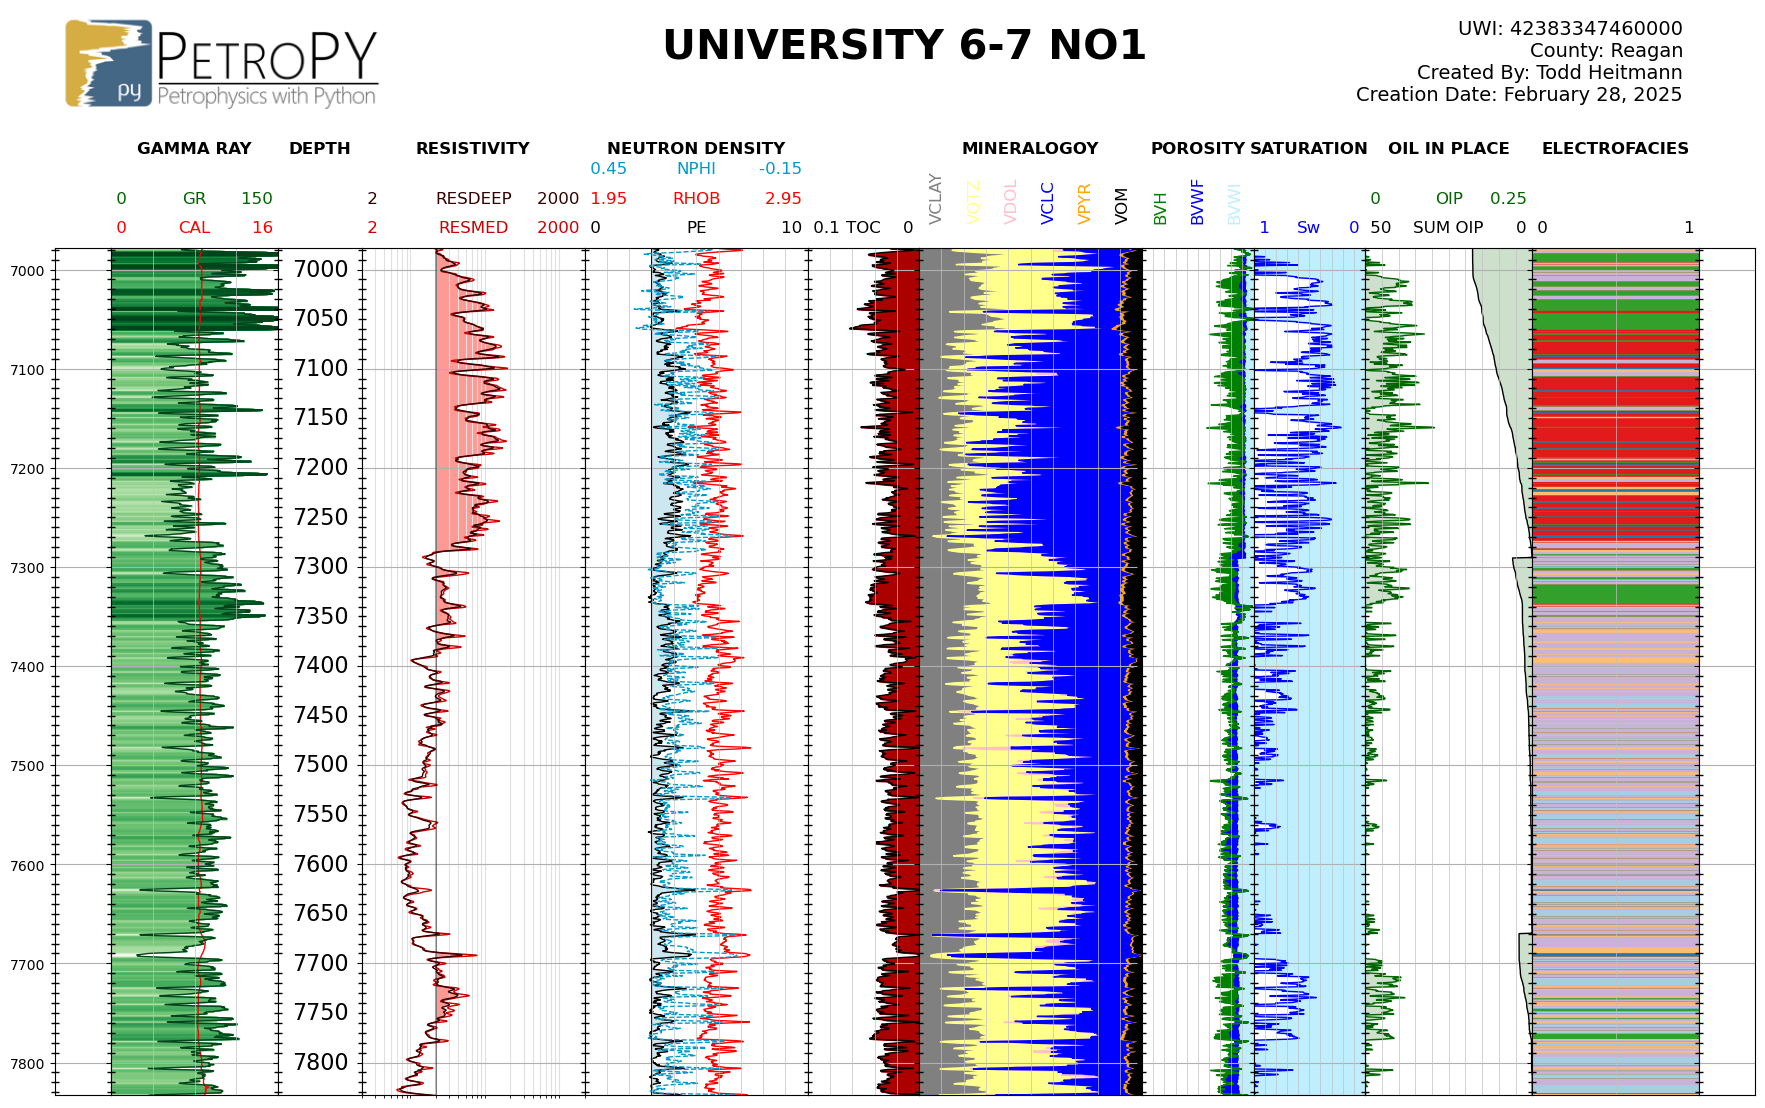

In [ ]:
### Third Iteration ###

for log in final_logs:

    ### 1. export statistics ###

    log.statistics_to_csv('../../examples/wfmp_processed_las/wfmp_statistics.csv',
                          replace = True, formations = f,
                          curves = stats_curves)

    ### 2. export data ###

    # find way to name well, looking for well name
    # or UWI or API                               

    if len(log.well['WELL'].value) > 0:
        well_name = log.well['WELL'].value
    elif len(str(log.well['UWI'].value)) > 0:
        well_name = str(log.well['UWI'].value)
    elif len(log.well['API'].value) > 0:
        well_name = str(log.well['API'].value)
    else:
        well_name = 'UNKNOWN'
    well_name = well_name.replace('.', '')

    # scale height of viewer to top and bottom    
    # of calculated values                        

    wfmpa_top = log.tops['WFMPA']
    wfmpc_base = log.next_formation_depth('WFMPC')

    top = wfmpa_top
    height = wfmpc_base - wfmpa_top

    # create LogViewer with the default full_oil 
    # template included in petropy               

    viewer = ptr.LogViewer(log, top = top, height = height,
                            template_defaults = 'full_oil')

    # set viewer to 17x11 inches size for use in 
    # PowerPoint or printing to larger paper     

    viewer.fig.set_size_inches(17, 11)

    # add well_name to title of LogViewer        

    viewer.fig.suptitle(well_name, fontweight = 'bold', fontsize = 30)

    # add logo to top left corner                #

    logo_im = plt.imread('../../examples/company_logo.png')
    logo_ax = viewer.fig.add_axes([0, 0.85, 0.2, 0.2])
    logo_ax.imshow(logo_im)
    logo_ax.axis('off')

    # add text to top right corner               

    label = ""
    if len(str(log.well['UWI'].value)) > 0:
        label = f"UWI: {log.well['UWI'].value}\n"
    elif len(log.well['API'].value) > 0:
        label = f"API: {log.well['API'].value}\n"

    label += "County: Reagan\nCreated By: Todd Heitmann\n"
    label += f"Creation Date: {datetime.now().strftime('%B %d, %Y')}"
    viewer.axes[0].annotate(label, xy = (0.99,0.99),
                        xycoords = 'figure fraction',
                        horizontalalignment = 'right',
                        verticalalignment = 'top',
                        fontsize = 14)

    # save figure and log                        

    viewer_file_name = f"../../examples/wfmp_processed_las/{well_name}_processed.png"
    las_file_name = f"../../examples/wfmp_processed_las/{well_name}_processed.las"

    viewer.fig.savefig(viewer_file_name)
    viewer.log.write(las_file_name)